In [1]:
import re
import difflib
from nltk.tokenize import TweetTokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random #As of now only used for generating 100 random tweets for manual labelling

## Reading data
### The Offensive Training Data

In [2]:
f = open("../data/raw/offensive/train_text.txt", 'r', encoding = "utf-8")
inputlist = [line for line in f]
f.close()

training_data, validation_data = inputlist[:len(inputlist)//2], inputlist[len(inputlist)//2:]


## Tokenizer as Function:

In [22]:
## patterns
def tokenizer(tweets):
    """
    Function that takes a list of strings and returns the tokenized version of each string
    """

    token_pat = re.compile(r'[\w@’#]+')
    skippable_pat = re.compile(r'\s+')

    non_white_space = re.compile(r'[^@’#\w\s]') #Finds characters that are not white_space nor word characters (nor @’#)


    tokenlist = []
    for i in tweets:
        tokens = []
        unmatchable = []
        line = i
        while line:
            skippable_match = re.search(skippable_pat, line)
            nws_match = re.search(non_white_space, line) #Search for non-word && non-whitespace chars (nws = non_white_space)
            if skippable_match and skippable_match.start() == 0:
                # If there is one at the beginning of the line, just skip it.
                line = line[skippable_match.end():]

            elif nws_match and nws_match.start() == 0: # If a character is neither non_white_space nor a word-character
                tokens.append(line[:nws_match.end()]) #Append it to tokens
                line = line[nws_match.end():] #Move further along in line
            else:
                # Else try finding a real token.
                token_match = re.search(token_pat, line)
                if token_match and token_match.start() == 0:
                    # If there is one at the beginning of the line, tokenise it.
                    tokens.append(line[:token_match.end()])
                    line = line[token_match.end():]
                else:
                    # Else there is unmatchable material here.
                    # It ends where a skippable or token match starts, or at the end of the line.
                    unmatchable_end = len(line)
                    if skippable_match:
                        unmatchable_end = skippable_match.start()
                    if token_match:
                        unmatchable_end = min(unmatchable_end, token_match.start())
                    # Add it to unmatchable and discard from line.
                    unmatchable.append(line[:unmatchable_end])
                    line = line[unmatchable_end:]
        tokenlist.append(tokens)
    return(tokenlist)



In [4]:
token_tweets = tokenizer(training_data)
#[print(*i) for i in token_tweets]

In [5]:
#TweetTokenizer Initialisation
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
j = 0
for i in training_data: 
    temp = i
    diff = difflib.context_diff(tknzr.tokenize(i),token_tweets[j])
    #print("".join(diff), end = "")
    print(i,"tknzr:",tknzr.tokenize(i),"\ntokenlist:",token_tweets[j],"\n")
    j+=1

@user Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen. 
 tknzr: ['Bono', '...', 'who', 'cares', '.', 'Soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity', '.', 'Become', 'a', 'Leader', 'of', 'your', 'people', 'instead', 'or', 'help', 'and', 'support', 'your', 'fellow', 'countrymen', '.'] 
tokenlist: ['@user', 'Bono', '.', '.', '.', 'who', 'cares', '.', 'Soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity', '.', 'Become', 'a', 'Leader', 'of', 'your', 'people', 'instead', 'or', 'help', 'and', 'support', 'your', 'fellow', 'countrymen', '.'] 

@user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president. 
 tknzr: ['Eight', 'years', 'the', 'republicans', 'denied', 'obam

@user @user @user @user @user @user I saw her in Denver last week. She is still traumatized. Cohen owes her so much because of 'My Life on the D List'. 
 tknzr: ['I', 'saw', 'her', 'in', 'Denver', 'last', 'week', '.', 'She', 'is', 'still', 'traumatized', '.', 'Cohen', 'owes', 'her', 'so', 'much', 'because', 'of', "'", 'My', 'Life', 'on', 'the', 'D', 'List', "'", '.'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', 'I', 'saw', 'her', 'in', 'Denver', 'last', 'week', '.', 'She', 'is', 'still', 'traumatized', '.', 'Cohen', 'owes', 'her', 'so', 'much', 'because', 'of', "'", 'My', 'Life', 'on', 'the', 'D', 'List', "'", '.'] 

@user America is better than swamp crud like YOU! 
 tknzr: ['America', 'is', 'better', 'than', 'swamp', 'crud', 'like', 'YOU', '!'] 
tokenlist: ['@user', 'America', 'is', 'better', 'than', 'swamp', 'crud', 'like', 'YOU', '!'] 

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Thank you for adding me

-Being on food stamps  -Liking boys/girls or liking both -Not knowing who you are -Your body size  -Not knowing something  -scared to ask for help -Not dating someone  -What you wear 
 tknzr: ['-', 'Being', 'on', 'food', 'stamps', '-', 'Liking', 'boys', '/', 'girls', 'or', 'liking', 'both', '-', 'Not', 'knowing', 'who', 'you', 'are', '-', 'Your', 'body', 'size', '-', 'Not', 'knowing', 'something', '-', 'scared', 'to', 'ask', 'for', 'help', '-', 'Not', 'dating', 'someone', '-', 'What', 'you', 'wear'] 
tokenlist: ['-', 'Being', 'on', 'food', 'stamps', '-', 'Liking', 'boys', '/', 'girls', 'or', 'liking', 'both', '-', 'Not', 'knowing', 'who', 'you', 'are', '-', 'Your', 'body', 'size', '-', 'Not', 'knowing', 'something', '-', 'scared', 'to', 'ask', 'for', 'help', '-', 'Not', 'dating', 'someone', '-', 'What', 'you', 'wear'] 

@user @user @user @user We are not a democratic republic. We have never been a Democratic anything. We have never had Democratic ideology. Nor is this a “new” talking p

@user Never Trumper uses brain for first time, wakes up to the fight #MAGA community has been waging for two years."""" 
 tknzr: ['Never', 'Trumper', 'uses', 'brain', 'for', 'first', 'time', ',', 'wakes', 'up', 'to', 'the', 'fight', '#MAGA', 'community', 'has', 'been', 'waging', 'for', 'two', 'years', '.', '"', '"', '"'] 
tokenlist: ['@user', 'Never', 'Trumper', 'uses', 'brain', 'for', 'first', 'time', ',', 'wakes', 'up', 'to', 'the', 'fight', '#MAGA', 'community', 'has', 'been', 'waging', 'for', 'two', 'years', '.', '"', '"', '"', '"'] 

@user Carrey is a pig🤬 
 tknzr: ['Carrey', 'is', 'a', 'pig', '🤬'] 
tokenlist: ['@user', 'Carrey', 'is', 'a', 'pig', '🤬'] 

@user @user @user It’s funny. That comment is 💯 Illogical. WalkAway is so easy. #maga is Great! #MEGA is already happenin Make Earth Great Again 
 tknzr: ['It', '’', 's', 'funny', '.', 'That', 'comment', 'is', '💯', 'Illogical', '.', 'WalkAway', 'is', 'so', 'easy', '.', '#maga', 'is', 'Great', '!', '#MEGA', 'is', 'already', 'happen

@user Gutiérrez you are a joke dress as an full 
 tknzr: ['Gutiérrez', 'you', 'are', 'a', 'joke', 'dress', 'as', 'an', 'full'] 
tokenlist: ['@user', 'Gutiérrez', 'you', 'are', 'a', 'joke', 'dress', 'as', 'an', 'full'] 

@user THE DEVIL MADE ME DO IT!!!!! THE UGLY FACE OF LIBERALS! I FEEL SORRY FOR THE INNOCENT HONEST ONES THAT ARE JUST BRAINWASHED! 
 tknzr: ['THE', 'DEVIL', 'MADE', 'ME', 'DO', 'IT', '!', '!', '!', 'THE', 'UGLY', 'FACE', 'OF', 'LIBERALS', '!', 'I', 'FEEL', 'SORRY', 'FOR', 'THE', 'INNOCENT', 'HONEST', 'ONES', 'THAT', 'ARE', 'JUST', 'BRAINWASHED', '!'] 
tokenlist: ['@user', 'THE', 'DEVIL', 'MADE', 'ME', 'DO', 'IT', '!', '!', '!', '!', '!', 'THE', 'UGLY', 'FACE', 'OF', 'LIBERALS', '!', 'I', 'FEEL', 'SORRY', 'FOR', 'THE', 'INNOCENT', 'HONEST', 'ONES', 'THAT', 'ARE', 'JUST', 'BRAINWASHED', '!'] 

@user No doubt progressive Nazi Antifa Liberal Democrats do. 
 tknzr: ['No', 'doubt', 'progressive', 'Nazi', 'Antifa', 'Liberal', 'Democrats', 'do', '.'] 
tokenlist: ['@user', 'No',

@user @user @user @user So you are ok with the racial epithats that the left calls black conservatives? #bigotry #hypocrisy #walkaway I did. Many have. Dont be blind. You are being a tool for a establishment. Keep resisting the outsider and be for the political elite millionaires. 
 tknzr: ['So', 'you', 'are', 'ok', 'with', 'the', 'racial', 'epithats', 'that', 'the', 'left', 'calls', 'black', 'conservatives', '?', '#bigotry', '#hypocrisy', '#walkaway', 'I', 'did', '.', 'Many', 'have', '.', 'Dont', 'be', 'blind', '.', 'You', 'are', 'being', 'a', 'tool', 'for', 'a', 'establishment', '.', 'Keep', 'resisting', 'the', 'outsider', 'and', 'be', 'for', 'the', 'political', 'elite', 'millionaires', '.'] 
tokenlist: ['@user', '@user', '@user', '@user', 'So', 'you', 'are', 'ok', 'with', 'the', 'racial', 'epithats', 'that', 'the', 'left', 'calls', 'black', 'conservatives', '?', '#bigotry', '#hypocrisy', '#walkaway', 'I', 'did', '.', 'Many', 'have', '.', 'Dont', 'be', 'blind', '.', 'You', 'are', 'be

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Exactly.  From what he is describing it is like two steps forward and three steps back. 
 tknzr: ['Exactly', '.', 'From', 'what', 'he', 'is', 'describing', 'it', 'is', 'like', 'two', 'steps', 'forward', 'and', 'three', 'steps', 'back', '.'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Exactly', 

#Health &amp; #Nature under threat from #UK #US @user 
 tknzr: ['#Health', '&', '#Nature', 'under', 'threat', 'from', '#UK', '#US'] 
tokenlist: ['#Health', '&', 'amp', ';', '#Nature', 'under', 'threat', 'from', '#UK', '#US', '@user'] 

@user She has no record on gun control. No thanks. 
 tknzr: ['She', 'has', 'no', 'record', 'on', 'gun', 'control', '.', 'No', 'thanks', '.'] 
tokenlist: ['@user', 'She', 'has', 'no', 'record', 'on', 'gun', 'control', '.', 'No', 'thanks', '.'] 

@user Cause I dead have no clue who she is. 
 tknzr: ['Cause', 'I', 'dead', 'have', 'no', 'clue', 'who', 'she', 'is', '.'] 
tokenlist: ['@user', 'Cause', 'I', 'dead', 'have', 'no', 'clue', 'who', 'she', 'is', '.'] 

@user @user @user @user I've noticed a lot of conservatives are thoroughly disingenuous when engaging in twitter. 
 tknzr: ["I've", 'noticed', 'a', 'lot', 'of', 'conservatives', 'are', 'thoroughly', 'disingenuous', 'when', 'engaging', 'in', 'twitter', '.'] 
tokenlist: ['@user', '@user', '@user', '@user

@user Yes Comie (communist pun intended) WE do and will emerge stronger when u &amp; all ur cronies are put to death at Gitmo. WE THE PEOPLE WILL INDEED BE STRONGER. #MAGA #DrainTheSwamp 
 tknzr: ['Yes', 'Comie', '(', 'communist', 'pun', 'intended', ')', 'WE', 'do', 'and', 'will', 'emerge', 'stronger', 'when', 'u', '&', 'all', 'ur', 'cronies', 'are', 'put', 'to', 'death', 'at', 'Gitmo', '.', 'WE', 'THE', 'PEOPLE', 'WILL', 'INDEED', 'BE', 'STRONGER', '.', '#MAGA', '#DrainTheSwamp'] 
tokenlist: ['@user', 'Yes', 'Comie', '(', 'communist', 'pun', 'intended', ')', 'WE', 'do', 'and', 'will', 'emerge', 'stronger', 'when', 'u', '&', 'amp', ';', 'all', 'ur', 'cronies', 'are', 'put', 'to', 'death', 'at', 'Gitmo', '.', 'WE', 'THE', 'PEOPLE', 'WILL', 'INDEED', 'BE', 'STRONGER', '.', '#MAGA', '#DrainTheSwamp'] 

@user Happy 1stbirthday to Savage(Songs from a Broken World)! This time lst yr it dropped in my door and damn did it do some shit! 🎶 Little did we all know the ride it was going to take you

@user @user Before this scumbag considers running for president I want him to publicly swear under oath that when he was in school he never tried to cop a feel as these liberals like to show themselves as pure as the driven snow. 
 tknzr: ['Before', 'this', 'scumbag', 'considers', 'running', 'for', 'president', 'I', 'want', 'him', 'to', 'publicly', 'swear', 'under', 'oath', 'that', 'when', 'he', 'was', 'in', 'school', 'he', 'never', 'tried', 'to', 'cop', 'a', 'feel', 'as', 'these', 'liberals', 'like', 'to', 'show', 'themselves', 'as', 'pure', 'as', 'the', 'driven', 'snow', '.'] 
tokenlist: ['@user', '@user', 'Before', 'this', 'scumbag', 'considers', 'running', 'for', 'president', 'I', 'want', 'him', 'to', 'publicly', 'swear', 'under', 'oath', 'that', 'when', 'he', 'was', 'in', 'school', 'he', 'never', 'tried', 'to', 'cop', 'a', 'feel', 'as', 'these', 'liberals', 'like', 'to', 'show', 'themselves', 'as', 'pure', 'as', 'the', 'driven', 'snow', '.'] 

@user @user @user @user And there's #

@user @user Hi Amy...your book is on my read list...thanks for speaking out Hope you are doing well🙂 
 tknzr: ['Hi', 'Amy', '...', 'your', 'book', 'is', 'on', 'my', 'read', 'list', '...', 'thanks', 'for', 'speaking', 'out', 'Hope', 'you', 'are', 'doing', 'well', '🙂'] 
tokenlist: ['@user', '@user', 'Hi', 'Amy', '.', '.', '.', 'your', 'book', 'is', 'on', 'my', 'read', 'list', '.', '.', '.', 'thanks', 'for', 'speaking', 'out', 'Hope', 'you', 'are', 'doing', 'well', '🙂'] 

@user Why are the tweets that Conservatives are retweeting with comments suddenly Unavailable? I cannot see what they’re talking about if the original tweet is no longer available. Anyone else noticing this? 
 tknzr: ['Why', 'are', 'the', 'tweets', 'that', 'Conservatives', 'are', 'retweeting', 'with', 'comments', 'suddenly', 'Unavailable', '?', 'I', 'cannot', 'see', 'what', 'they', '’', 're', 'talking', 'about', 'if', 'the', 'original', 'tweet', 'is', 'no', 'longer', 'available', '.', 'Anyone', 'else', 'noticing', 'this'

@user oh shit uhhh what ao3 fic is this 
 tknzr: ['oh', 'shit', 'uhhh', 'what', 'ao3', 'fic', 'is', 'this'] 
tokenlist: ['@user', 'oh', 'shit', 'uhhh', 'what', 'ao3', 'fic', 'is', 'this'] 

@user Gawd help us. 
 tknzr: ['Gawd', 'help', 'us', '.'] 
tokenlist: ['@user', 'Gawd', 'help', 'us', '.'] 

@user It’s Good for our Gun Business. More Guns sell when these people bring up Gun Control. Keep up the Great Work. Guns for All. 
 tknzr: ['It', '’', 's', 'Good', 'for', 'our', 'Gun', 'Business', '.', 'More', 'Guns', 'sell', 'when', 'these', 'people', 'bring', 'up', 'Gun', 'Control', '.', 'Keep', 'up', 'the', 'Great', 'Work', '.', 'Guns', 'for', 'All', '.'] 
tokenlist: ['@user', 'It’s', 'Good', 'for', 'our', 'Gun', 'Business', '.', 'More', 'Guns', 'sell', 'when', 'these', 'people', 'bring', 'up', 'Gun', 'Control', '.', 'Keep', 'up', 'the', 'Great', 'Work', '.', 'Guns', 'for', 'All', '.'] 

@user @user But refugees! Marijuana! Peoplekind! Gun control! 
 tknzr: ['But', 'refugees', '!', 'Mariju

@user What did u just notice that he is not actually a good speaker just a good reader 
 tknzr: ['What', 'did', 'u', 'just', 'notice', 'that', 'he', 'is', 'not', 'actually', 'a', 'good', 'speaker', 'just', 'a', 'good', 'reader'] 
tokenlist: ['@user', 'What', 'did', 'u', 'just', 'notice', 'that', 'he', 'is', 'not', 'actually', 'a', 'good', 'speaker', 'just', 'a', 'good', 'reader'] 

@user @user :  When we lead, sheeple follow"" 
 tknzr: [':', 'When', 'we', 'lead', ',', 'sheeple', 'follow', '"', '"'] 
tokenlist: ['@user', '@user', ':', 'When', 'we', 'lead', ',', 'sheeple', 'follow', '"', '"'] 

@user @user thank god for the PPC party eh true conservatives who believe in getting out of the Paris accord and dropping supply and demand on Dairy 
 tknzr: ['thank', 'god', 'for', 'the', 'PPC', 'party', 'eh', 'true', 'conservatives', 'who', 'believe', 'in', 'getting', 'out', 'of', 'the', 'Paris', 'accord', 'and', 'dropping', 'supply', 'and', 'demand', 'on', 'Dairy'] 
tokenlist: ['@user', '@user'

16 year old stabbed in Dagenham this evening and the liberals are worried about data protection.  #c4news 
 tknzr: ['16', 'year', 'old', 'stabbed', 'in', 'Dagenham', 'this', 'evening', 'and', 'the', 'liberals', 'are', 'worried', 'about', 'data', 'protection', '.', '#c4news'] 
tokenlist: ['16', 'year', 'old', 'stabbed', 'in', 'Dagenham', 'this', 'evening', 'and', 'the', 'liberals', 'are', 'worried', 'about', 'data', 'protection', '.', '#c4news'] 

@user ... Do a few more lines Moore. 
 tknzr: ['...', 'Do', 'a', 'few', 'more', 'lines', 'Moore', '.'] 
tokenlist: ['@user', '.', '.', '.', 'Do', 'a', 'few', 'more', 'lines', 'Moore', '.'] 

@user @user @user It started with Cameron and May is even worse. She is not a Conservative! 
 tknzr: ['It', 'started', 'with', 'Cameron', 'and', 'May', 'is', 'even', 'worse', '.', 'She', 'is', 'not', 'a', 'Conservative', '!'] 
tokenlist: ['@user', '@user', '@user', 'It', 'started', 'with', 'Cameron', 'and', 'May', 'is', 'even', 'worse', '.', 'She', 'is', '

@user you're on fucking drugs my dude 
 tknzr: ["you're", 'on', 'fucking', 'drugs', 'my', 'dude'] 
tokenlist: ['@user', 'you', "'", 're', 'on', 'fucking', 'drugs', 'my', 'dude'] 

@user @user @user @user @user @user She is being realistic tho 
 tknzr: ['She', 'is', 'being', 'realistic', 'tho'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', 'She', 'is', 'being', 'realistic', 'tho'] 

@user @user @user Did you hurt yourself jumping to that conclusion?   If you want biblical scholarship worth having read Bart D. Ehrman.  If you want ignorant schlock...well you are already here. 
 tknzr: ['Did', 'you', 'hurt', 'yourself', 'jumping', 'to', 'that', 'conclusion', '?', 'If', 'you', 'want', 'biblical', 'scholarship', 'worth', 'having', 'read', 'Bart', 'D', '.', 'Ehrman', '.', 'If', 'you', 'want', 'ignorant', 'schlock', '...', 'well', 'you', 'are', 'already', 'here', '.'] 
tokenlist: ['@user', '@user', '@user', 'Did', 'you', 'hurt', 'yourself', 'jumping', 'to', 'that', 'concl

@user @user And I don’t call striking down gun control legislation curtailing our civil rights.   Gun control legislation is just common sense. 
 tknzr: ['And', 'I', 'don', '’', 't', 'call', 'striking', 'down', 'gun', 'control', 'legislation', 'curtailing', 'our', 'civil', 'rights', '.', 'Gun', 'control', 'legislation', 'is', 'just', 'common', 'sense', '.'] 
tokenlist: ['@user', '@user', 'And', 'I', 'don’t', 'call', 'striking', 'down', 'gun', 'control', 'legislation', 'curtailing', 'our', 'civil', 'rights', '.', 'Gun', 'control', 'legislation', 'is', 'just', 'common', 'sense', '.'] 

@user All the way to prison... 
 tknzr: ['All', 'the', 'way', 'to', 'prison', '...'] 
tokenlist: ['@user', 'All', 'the', 'way', 'to', 'prison', '.', '.', '.'] 

@user Call is normal  thing tho cos you even call your friends she should sub for herself she is not yet your responsibility to start buying data  Outing?  Dunno😀go for lowcut girls them full my hometown ☺☺ 
 tknzr: ['Call', 'is', 'normal', 'thing'

@user We need Gun Control Now. We have had too many mass shootings in this country. Thank you President Clinton for leading the way in this. It's great to have real leadership 
 tknzr: ['We', 'need', 'Gun', 'Control', 'Now', '.', 'We', 'have', 'had', 'too', 'many', 'mass', 'shootings', 'in', 'this', 'country', '.', 'Thank', 'you', 'President', 'Clinton', 'for', 'leading', 'the', 'way', 'in', 'this', '.', "It's", 'great', 'to', 'have', 'real', 'leadership'] 
tokenlist: ['@user', 'We', 'need', 'Gun', 'Control', 'Now', '.', 'We', 'have', 'had', 'too', 'many', 'mass', 'shootings', 'in', 'this', 'country', '.', 'Thank', 'you', 'President', 'Clinton', 'for', 'leading', 'the', 'way', 'in', 'this', '.', 'It', "'", 's', 'great', 'to', 'have', 'real', 'leadership'] 

According to a student that spoke under condition of anonymity, the furniture in Johnson Hall has been replaced by even shittier couches."" #seuday"" 
 tknzr: ['According', 'to', 'a', 'student', 'that', 'spoke', 'under', 'condition'

@user I don’t understand why she should be heard.  I SHOULD BE HEARD and I have pictures and scars from my TRAUMA #ILLEGALALIEN left his car I. The middle of #405 fwy in 1982 - when I was 18!  We were badly damaged!  #California #losangeles #Kavanaugh #MAGA 
 tknzr: ['I', 'don', '’', 't', 'understand', 'why', 'she', 'should', 'be', 'heard', '.', 'I', 'SHOULD', 'BE', 'HEARD', 'and', 'I', 'have', 'pictures', 'and', 'scars', 'from', 'my', 'TRAUMA', '#ILLEGALALIEN', 'left', 'his', 'car', 'I', '.', 'The', 'middle', 'of', '#405', 'fwy', 'in', '1982', '-', 'when', 'I', 'was', '18', '!', 'We', 'were', 'badly', 'damaged', '!', '#California', '#losangeles', '#Kavanaugh', '#MAGA'] 
tokenlist: ['@user', 'I', 'don’t', 'understand', 'why', 'she', 'should', 'be', 'heard', '.', 'I', 'SHOULD', 'BE', 'HEARD', 'and', 'I', 'have', 'pictures', 'and', 'scars', 'from', 'my', 'TRAUMA', '#ILLEGALALIEN', 'left', 'his', 'car', 'I', '.', 'The', 'middle', 'of', '#405', 'fwy', 'in', '1982', '-', 'when', 'I', 'was',

 tknzr: ['*', '60', '…', '*', 'Sixty', 'year', 'old', '!', 'Man', '...', 'she', 'is', 'fine'] 
tokenlist: ['*', '60', '…', '*', 'Sixty', 'year', 'old', '!', 'Man', '.', '.', '.', '.', '.', '.', 'she', 'is', 'fine'] 

@user @user @user Super storm Sandy hit the North East. I agree with you though. People here have a bad idea of the east coast and it's pretty cool. The north east gets all 4 seasons at least. We get rain and summer. 
 tknzr: ['Super', 'storm', 'Sandy', 'hit', 'the', 'North', 'East', '.', 'I', 'agree', 'with', 'you', 'though', '.', 'People', 'here', 'have', 'a', 'bad', 'idea', 'of', 'the', 'east', 'coast', 'and', "it's", 'pretty', 'cool', '.', 'The', 'north', 'east', 'gets', 'all', '4', 'seasons', 'at', 'least', '.', 'We', 'get', 'rain', 'and', 'summer', '.'] 
tokenlist: ['@user', '@user', '@user', 'Super', 'storm', 'Sandy', 'hit', 'the', 'North', 'East', '.', 'I', 'agree', 'with', 'you', 'though', '.', 'People', 'here', 'have', 'a', 'bad', 'idea', 'of', 'the', 'east', 'co

 tknzr: ['She', 'is', 'a', 'disgusting', 'Coont', '!'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', 'She', 'is', 'a', 'disgusting', 'Coont', '!'] 

@user @user @user @user He is building it. 
 tknzr: ['He', 'is', 'building', 'it', '.'] 
tokenlist: ['@user', '@user', '@user', '@user', 'He', 'is', 'building', 'it', '.'] 

@user @user Ezra is a cockroach who needs to have light shone on. 
 tknzr: ['Ezra', 'is', 'a', 'cockroach', 'who', 'needs', 'to', 'have', 'light', 'shone', 'on', '.'] 
tokenlist: ['@user', '@user', 'Ezra', 'is', 'a', 'cockroach', 'who', 'needs', 'to', 'have', 'light', 'shone', 'on', '.'] 

@user When will they learn.  People dont care about what they think about politics.  Just read your lines and entertain us.  Keep your stupid pins and fake tattoos and ribbons at home. #MAGA #Emmys 
 tknzr: ['When', 'will', 'they', 'learn', '.', 'People', 'dont', 'care', 'about', 'what', 'they', 'think', 'about', 'politics', '.', 'Just', 'read', 'your', 'lines', 'and', 'e

@user I thought that I could not dislike anyone more than your father but I was wrong.  You are even more PATHETIC than he is.  Your children must be so proud to have a father who behaves like you.  Tick tock....  #MuellerIsComingForYouToo #PatheticLittleManJr 
 tknzr: ['I', 'thought', 'that', 'I', 'could', 'not', 'dislike', 'anyone', 'more', 'than', 'your', 'father', 'but', 'I', 'was', 'wrong', '.', 'You', 'are', 'even', 'more', 'PATHETIC', 'than', 'he', 'is', '.', 'Your', 'children', 'must', 'be', 'so', 'proud', 'to', 'have', 'a', 'father', 'who', 'behaves', 'like', 'you', '.', 'Tick', 'tock', '...', '#MuellerIsComingForYouToo', '#PatheticLittleManJr'] 
tokenlist: ['@user', 'I', 'thought', 'that', 'I', 'could', 'not', 'dislike', 'anyone', 'more', 'than', 'your', 'father', 'but', 'I', 'was', 'wrong', '.', 'You', 'are', 'even', 'more', 'PATHETIC', 'than', 'he', 'is', '.', 'Your', 'children', 'must', 'be', 'so', 'proud', 'to', 'have', 'a', 'father', 'who', 'behaves', 'like', 'you', '.',

@user @user @user @user @user @user @user @user @user @user @user @user @user @user Great girl and I’m sure there are more of them. In the Democratic Party. She is a real prize 
 tknzr: ['Great', 'girl', 'and', 'I', '’', 'm', 'sure', 'there', 'are', 'more', 'of', 'them', '.', 'In', 'the', 'Democratic', 'Party', '.', 'She', 'is', 'a', 'real', 'prize'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Great', 'girl', 'and', 'I’m', 'sure', 'there', 'are', 'more', 'of', 'them', '.', 'In', 'the', 'Democratic', 'Party', '.', 'She', 'is', 'a', 'real', 'prize'] 

@user @user Maybe he can help the liberals with TDS. 
 tknzr: ['Maybe', 'he', 'can', 'help', 'the', 'liberals', 'with', 'TDS', '.'] 
tokenlist: ['@user', '@user', 'Maybe', 'he', 'can', 'help', 'the', 'liberals', 'with', 'TDS', '.'] 

@user Watching liberals get all uppity at you though was the best part.  They jump to defend the scum as ever. 
 t

@user @user Bwaaaaa!! Compared to who...Trump...bwaaaaaaa! Compared to that corrupt demented lunatic she is a godsend!!! 
 tknzr: ['Bwaaa', '!', '!', 'Compared', 'to', 'who', '...', 'Trump', '...', 'bwaaa', '!', 'Compared', 'to', 'that', 'corrupt', 'demented', 'lunatic', 'she', 'is', 'a', 'godsend', '!', '!', '!'] 
tokenlist: ['@user', '@user', 'Bwaaaaa', '!', '!', 'Compared', 'to', 'who', '.', '.', '.', 'Trump', '.', '.', '.', 'bwaaaaaaa', '!', 'Compared', 'to', 'that', 'corrupt', 'demented', 'lunatic', 'she', 'is', 'a', 'godsend', '!', '!', '!'] 

@user @user @user @user @user You challenged  libtards"" im here..my thoughts on gun control are simple assault weapons should be banned for civilians I don' t remember 17- 59 people murdered in 20 with a hammer I own a hand gun for protection i support our 2nd amendment"" 
 tknzr: ['You', 'challenged', 'libtards', '"', '"', 'im', 'here', '..', 'my', 'thoughts', 'on', 'gun', 'control', 'are', 'simple', 'assault', 'weapons', 'should', 'be', 

@user @user All the news outlets can continue to write stories about Michael Moore and what he says but I’m one of the millions that don’t really give a hoot about Michael Moore and what he says 
 tknzr: ['All', 'the', 'news', 'outlets', 'can', 'continue', 'to', 'write', 'stories', 'about', 'Michael', 'Moore', 'and', 'what', 'he', 'says', 'but', 'I', '’', 'm', 'one', 'of', 'the', 'millions', 'that', 'don', '’', 't', 'really', 'give', 'a', 'hoot', 'about', 'Michael', 'Moore', 'and', 'what', 'he', 'says'] 
tokenlist: ['@user', '@user', 'All', 'the', 'news', 'outlets', 'can', 'continue', 'to', 'write', 'stories', 'about', 'Michael', 'Moore', 'and', 'what', 'he', 'says', 'but', 'I’m', 'one', 'of', 'the', 'millions', 'that', 'don’t', 'really', 'give', 'a', 'hoot', 'about', 'Michael', 'Moore', 'and', 'what', 'he', 'says'] 

@user Missing words are politically motivated. I have visited Israel in the past four times. I am not anti Semitic. There is more anti Semitism and racism in the @user pa

 tknzr: ['Ha', '!', 'Ha', '!', 'Don', '’', 't', 'forget', ':', 'Too', 'soon', 'to', 'talk', 'about', 'gun', 'control', '.'] 
tokenlist: ['@user', '@user', 'Ha', '!', 'Ha', '!', 'Don’t', 'forget', ':', 'Too', 'soon', 'to', 'talk', 'about', 'gun', 'control', '.'] 

@user @user Yes Canada that is another great achievement from the #Trudeau #Liberals it just keeps getting better 
 tknzr: ['Yes', 'Canada', 'that', 'is', 'another', 'great', 'achievement', 'from', 'the', '#Trudeau', '#Liberals', 'it', 'just', 'keeps', 'getting', 'better'] 
tokenlist: ['@user', '@user', 'Yes', 'Canada', 'that', 'is', 'another', 'great', 'achievement', 'from', 'the', '#Trudeau', '#Liberals', 'it', 'just', 'keeps', 'getting', 'better'] 

@user @user Except he is. His administration has allowed crime in the city to skyrocket. You bloody leftist snake. 
 tknzr: ['Except', 'he', 'is', '.', 'His', 'administration', 'has', 'allowed', 'crime', 'in', 'the', 'city', 'to', 'skyrocket', '.', 'You', 'bloody', 'leftist', 's

@user Figures! What is wrong with these idiots? Thank God for @user 
 tknzr: ['Figures', '!', 'What', 'is', 'wrong', 'with', 'these', 'idiots', '?', 'Thank', 'God', 'for'] 
tokenlist: ['@user', 'Figures', '!', 'What', 'is', 'wrong', 'with', 'these', 'idiots', '?', 'Thank', 'God', 'for', '@user'] 

@user I can definitely do that for sure! 
 tknzr: ['I', 'can', 'definitely', 'do', 'that', 'for', 'sure', '!'] 
tokenlist: ['@user', 'I', 'can', 'definitely', 'do', 'that', 'for', 'sure', '!'] 

@user - that he is but Jace is also worth it. The hetero keep winning. 
 tknzr: ['-', 'that', 'he', 'is', 'but', 'Jace', 'is', 'also', 'worth', 'it', '.', 'The', 'hetero', 'keep', 'winning', '.'] 
tokenlist: ['@user', '-', 'that', 'he', 'is', 'but', 'Jace', 'is', 'also', 'worth', 'it', '.', 'The', 'hetero', 'keep', 'winning', '.'] 

@user @user Thank You🙏Followed You🍎 #Maga  💯🇺🇸🇺🇸🇺🇸 
 tknzr: ['Thank', 'You', '🙏', 'Followed', 'You', '🍎', '#Maga', '💯', '🇺', '🇸', '🇺', '🇸', '🇺', '🇸'] 
tokenlist: ['@user',

@user It would be better to call themFaux liberals/Fox Liberals"" b/c the word ""Liberal"" is not bad (moral philosophy) &amp; I don't want the word to be tainted by people who don't know the actual definition. Look at the word ""feminism"", society changed its meaning into something negative."" 
 tknzr: ['It', 'would', 'be', 'better', 'to', 'call', 'themFaux', 'liberals', '/', 'Fox', 'Liberals', '"', '"', 'b', '/', 'c', 'the', 'word', '"', '"', 'Liberal', '"', '"', 'is', 'not', 'bad', '(', 'moral', 'philosophy', ')', '&', 'I', "don't", 'want', 'the', 'word', 'to', 'be', 'tainted', 'by', 'people', 'who', "don't", 'know', 'the', 'actual', 'definition', '.', 'Look', 'at', 'the', 'word', '"', '"', 'feminism', '"', '"', ',', 'society', 'changed', 'its', 'meaning', 'into', 'something', 'negative', '.', '"', '"'] 
tokenlist: ['@user', 'It', 'would', 'be', 'better', 'to', 'call', 'themFaux', 'liberals', '/', 'Fox', 'Liberals', '"', '"', 'b', '/', 'c', 'the', 'word', '"', '"', 'Liberal', '"', 

All this talk about Trump's dick allegedly looking like Toad from #MarioKart  This is the only thing that has been accomplished. Only now the libs are picturing a 70 year old man naked.   #MAGA 
 tknzr: ['All', 'this', 'talk', 'about', "Trump's", 'dick', 'allegedly', 'looking', 'like', 'Toad', 'from', '#MarioKart', 'This', 'is', 'the', 'only', 'thing', 'that', 'has', 'been', 'accomplished', '.', 'Only', 'now', 'the', 'libs', 'are', 'picturing', 'a', '70', 'year', 'old', 'man', 'naked', '.', '#MAGA'] 
tokenlist: ['All', 'this', 'talk', 'about', 'Trump', "'", 's', 'dick', 'allegedly', 'looking', 'like', 'Toad', 'from', '#MarioKart', 'This', 'is', 'the', 'only', 'thing', 'that', 'has', 'been', 'accomplished', '.', 'Only', 'now', 'the', 'libs', 'are', 'picturing', 'a', '70', 'year', 'old', 'man', 'naked', '.', '#MAGA'] 

@user Documents must be getting close to this crook. 
 tknzr: ['Documents', 'must', 'be', 'getting', 'close', 'to', 'this', 'crook', '.'] 
tokenlist: ['@user', 'Documents'

 tknzr: ['Can', 'you', 'eat', 'this', 'child', 'you', 'are', 'wild'] 
tokenlist: ['@user', '@user', '@user', 'Can', 'you', 'eat', 'this', 'child', 'you', 'are', 'wild'] 

@user @user @user @user The choice is simple. If you vote Gillum you are voting for Socialism. If you vote for Ron DeSantis you are voting for everything that makes Florida great. #VoteRonDeSantis2018 
 tknzr: ['The', 'choice', 'is', 'simple', '.', 'If', 'you', 'vote', 'Gillum', 'you', 'are', 'voting', 'for', 'Socialism', '.', 'If', 'you', 'vote', 'for', 'Ron', 'DeSantis', 'you', 'are', 'voting', 'for', 'everything', 'that', 'makes', 'Florida', 'great', '.', '#VoteRonDeSantis2018'] 
tokenlist: ['@user', '@user', '@user', '@user', 'The', 'choice', 'is', 'simple', '.', 'If', 'you', 'vote', 'Gillum', 'you', 'are', 'voting', 'for', 'Socialism', '.', 'If', 'you', 'vote', 'for', 'Ron', 'DeSantis', 'you', 'are', 'voting', 'for', 'everything', 'that', 'makes', 'Florida', 'great', '.', '#VoteRonDeSantis2018'] 

@user @user Hah

@user @user in every conner coz anti pakistani will not able to attack on our future generation rights 
 tknzr: ['in', 'every', 'conner', 'coz', 'anti', 'pakistani', 'will', 'not', 'able', 'to', 'attack', 'on', 'our', 'future', 'generation', 'rights'] 
tokenlist: ['@user', '@user', 'in', 'every', 'conner', 'coz', 'anti', 'pakistani', 'will', 'not', 'able', 'to', 'attack', 'on', 'our', 'future', 'generation', 'rights'] 

@user Was Al Gore nominated for Supreme Court judge? You conservatives have some nerve. 
 tknzr: ['Was', 'Al', 'Gore', 'nominated', 'for', 'Supreme', 'Court', 'judge', '?', 'You', 'conservatives', 'have', 'some', 'nerve', '.'] 
tokenlist: ['@user', 'Was', 'Al', 'Gore', 'nominated', 'for', 'Supreme', 'Court', 'judge', '?', 'You', 'conservatives', 'have', 'some', 'nerve', '.'] 

@user He is compromising an active investigation. Sounds like obstruction of justice to me! 
 tknzr: ['He', 'is', 'compromising', 'an', 'active', 'investigation', '.', 'Sounds', 'like', 'obstructi

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Followed and retweeted. I follow all Trump supporters. 
 tknzr: ['Followed', 'and', 'retweeted', '.', 'I', 'follow', 'all', 'Trump', 'supporters', '.'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Followed', 'and', 'retweeted', '.', 'I', 'follow', 'all', 'Trump', 'supporters', '.'] 

#science #ecology #health #nature The Problem of the One and the Many in Gun Control 
 tknzr: ['#science', '#ecology', '#health', '#nature', 'The', 'Problem', 'of', 'the', 'One', 'and', 'the', 'Many', 'in', 'Gun', 'Control'] 
tokenlist: ['#science', '#ecology', '#health', '#nature', 'The', 'Problem', 'of', 'the', 'One', 'and', 'the', 'Many', 'in', 'Gun', 'Control'] 

@user Bitter Barack loves a free press as long as they were on his band wagon. 
 tknzr: ['Bitter', 'Barack

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user President Trump will post a message 9-20 to our cell phones. Prepping for internet social media block out. 
 tknzr: ['President', 'Trump', 'will', 'post', 'a', 'message', '9-20', 'to', 'our', 'cell', 'phones', '.', 'Prepping', 'for', 'internet', 'social', 'media', 'block', 'out', '.'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'President', 'Trump', 'will', 'post', 'a', 'message', '9', '-', '20', 'to', 'our', 'ce

@user If you are not sure then l will block all these useless tweets. OK ? 
 tknzr: ['If', 'you', 'are', 'not', 'sure', 'then', 'l', 'will', 'block', 'all', 'these', 'useless', 'tweets', '.', 'OK', '?'] 
tokenlist: ['@user', 'If', 'you', 'are', 'not', 'sure', 'then', 'l', 'will', 'block', 'all', 'these', 'useless', 'tweets', '.', 'OK', '?'] 

@user Yes do hurt your selves gun control freaks. 
 tknzr: ['Yes', 'do', 'hurt', 'your', 'selves', 'gun', 'control', 'freaks', '.'] 
tokenlist: ['@user', 'Yes', 'do', 'hurt', 'your', 'selves', 'gun', 'control', 'freaks', '.'] 

@user @user @user @user If you are running a top 3 offense every year &amp; still get fired from Pitt there are concerns. As talented as he is players don’t like playing for him you have to have balance can’t be in your face 24/7 
 tknzr: ['If', 'you', 'are', 'running', 'a', 'top', '3', 'offense', 'every', 'year', '&', 'still', 'get', 'fired', 'from', 'Pitt', 'there', 'are', 'concerns', '.', 'As', 'talented', 'as', 'he', 'i

@user He is not a troll he is simply dumb but I’m enjoying it I love tweeter for this 🤣🤣🤣🤣🤣🤣🤣 
 tknzr: ['He', 'is', 'not', 'a', 'troll', 'he', 'is', 'simply', 'dumb', 'but', 'I', '’', 'm', 'enjoying', 'it', 'I', 'love', 'tweeter', 'for', 'this', '🤣', '🤣', '🤣'] 
tokenlist: ['@user', 'He', 'is', 'not', 'a', 'troll', 'he', 'is', 'simply', 'dumb', 'but', 'I’m', 'enjoying', 'it', 'I', 'love', 'tweeter', 'for', 'this', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣'] 

@user If you look it up it will tell you how they did the study he is right 
 tknzr: ['If', 'you', 'look', 'it', 'up', 'it', 'will', 'tell', 'you', 'how', 'they', 'did', 'the', 'study', 'he', 'is', 'right'] 
tokenlist: ['@user', 'If', 'you', 'look', 'it', 'up', 'it', 'will', 'tell', 'you', 'how', 'they', 'did', 'the', 'study', 'he', 'is', 'right'] 

@user @user So Victoria's Secret won't sponsor Trump any more. I hope they realize how much of their crap trump has sold for them to Antifa! 
 tknzr: ['So', "Victoria's", 'Secret', "won't", 'spo

@user ...@USER is 100% correct and should be applauded for criticizing our inept and corrupt President - not denounced for it.....@USER @user @user @user @user @user @user @user @user @user @user @user 
 tknzr: ['...', 'is', '100', '%', 'correct', 'and', 'should', 'be', 'applauded', 'for', 'criticizing', 'our', 'inept', 'and', 'corrupt', 'President', '-', 'not', 'denounced', 'for', 'it', '...'] 
tokenlist: ['@user', '.', '.', '.', '@USER', 'is', '100', '%', 'correct', 'and', 'should', 'be', 'applauded', 'for', 'criticizing', 'our', 'inept', 'and', 'corrupt', 'President', '-', 'not', 'denounced', 'for', 'it', '.', '.', '.', '.', '.', '@USER', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user'] 

@user I still want yo know when you are doing stairway to heaven. 🤣 
 tknzr: ['I', 'still', 'want', 'yo', 'know', 'when', 'you', 'are', 'doing', 'stairway', 'to', 'heaven', '.', '🤣'] 
tokenlist: ['@user', 'I', 'still', 'want', 'yo', 'know', 'when', 

@user @user @user Awesome tweet. You bring out the best in people and you are appreciated. Thanks for yesterday's many live updates  and live coverage and that was just one news story! 
 tknzr: ['Awesome', 'tweet', '.', 'You', 'bring', 'out', 'the', 'best', 'in', 'people', 'and', 'you', 'are', 'appreciated', '.', 'Thanks', 'for', "yesterday's", 'many', 'live', 'updates', 'and', 'live', 'coverage', 'and', 'that', 'was', 'just', 'one', 'news', 'story', '!'] 
tokenlist: ['@user', '@user', '@user', 'Awesome', 'tweet', '.', 'You', 'bring', 'out', 'the', 'best', 'in', 'people', 'and', 'you', 'are', 'appreciated', '.', 'Thanks', 'for', 'yesterday', "'", 's', 'many', 'live', 'updates', 'and', 'live', 'coverage', 'and', 'that', 'was', 'just', 'one', 'news', 'story', '!'] 

@user @user I’m sorry that’s how the rap game goes. If I’m working with a producer that’s working with my enemy why wouldn’t I be like either them or me. Find your own ppl. This is rap and she is well within her right to. 
 t

@user What’s the difference between #Kavanaugh and @user   One of these men admitted to groping a 15 year old girl years ago.  The other is going to be #confirmed to the SCJ   #DemsareFrauds #DemsAreDone   #WalkAwayDemocrats2018 #redwave #VoteRedSaveAmerica #trumptrain #MAGA 
 tknzr: ['What', '’', 's', 'the', 'difference', 'between', '#Kavanaugh', 'and', 'One', 'of', 'these', 'men', 'admitted', 'to', 'groping', 'a', '15', 'year', 'old', 'girl', 'years', 'ago', '.', 'The', 'other', 'is', 'going', 'to', 'be', '#confirmed', 'to', 'the', 'SCJ', '#DemsareFrauds', '#DemsAreDone', '#WalkAwayDemocrats2018', '#redwave', '#VoteRedSaveAmerica', '#trumptrain', '#MAGA'] 
tokenlist: ['@user', 'What’s', 'the', 'difference', 'between', '#Kavanaugh', 'and', '@user', 'One', 'of', 'these', 'men', 'admitted', 'to', 'groping', 'a', '15', 'year', 'old', 'girl', 'years', 'ago', '.', 'The', 'other', 'is', 'going', 'to', 'be', '#confirmed', 'to', 'the', 'SCJ', '#DemsareFrauds', '#DemsAreDone', '#WalkAwayDemocr

@user @user @user @user @user @user @user The vast majority of counterprotestors were normal Cville residents. There were a few antifa and a few BLM people. All violence was instigated initially by the white supremacists. Antifa protected clergy members and black residents. 
 tknzr: ['The', 'vast', 'majority', 'of', 'counterprotestors', 'were', 'normal', 'Cville', 'residents', '.', 'There', 'were', 'a', 'few', 'antifa', 'and', 'a', 'few', 'BLM', 'people', '.', 'All', 'violence', 'was', 'instigated', 'initially', 'by', 'the', 'white', 'supremacists', '.', 'Antifa', 'protected', 'clergy', 'members', 'and', 'black', 'residents', '.'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', '@user', 'The', 'vast', 'majority', 'of', 'counterprotestors', 'were', 'normal', 'Cville', 'residents', '.', 'There', 'were', 'a', 'few', 'antifa', 'and', 'a', 'few', 'BLM', 'people', '.', 'All', 'violence', 'was', 'instigated', 'initially', 'by', 'the', 'white', 'supremacists', '.', 'Antifa',

@user Tom was bought! He is more interested in Tom than his constituents 
 tknzr: ['Tom', 'was', 'bought', '!', 'He', 'is', 'more', 'interested', 'in', 'Tom', 'than', 'his', 'constituents'] 
tokenlist: ['@user', 'Tom', 'was', 'bought', '!', 'He', 'is', 'more', 'interested', 'in', 'Tom', 'than', 'his', 'constituents'] 

@user @user @user Actually my ancestors were here long before anyone got here even your French ass! Native Americans were here first. So get your facts straight! So if you wanna throw punches make sure you know who and where you are throwing them first. 
 tknzr: ['Actually', 'my', 'ancestors', 'were', 'here', 'long', 'before', 'anyone', 'got', 'here', 'even', 'your', 'French', 'ass', '!', 'Native', 'Americans', 'were', 'here', 'first', '.', 'So', 'get', 'your', 'facts', 'straight', '!', 'So', 'if', 'you', 'wanna', 'throw', 'punches', 'make', 'sure', 'you', 'know', 'who', 'and', 'where', 'you', 'are', 'throwing', 'them', 'first', '.'] 
tokenlist: ['@user', '@user', '@user

54% of Americans say the nation is on the wrong track. 🇺🇸 
 tknzr: ['54', '%', 'of', 'Americans', 'say', 'the', 'nation', 'is', 'on', 'the', 'wrong', 'track', '.', '🇺', '🇸'] 
tokenlist: ['54', '%', 'of', 'Americans', 'say', 'the', 'nation', 'is', 'on', 'the', 'wrong', 'track', '.', '🇺', '🇸'] 

@user @user If they don't change course the Tories are going to be toast at the next general election.  They do not want to go the way of the Canadian Conservatives in 1993 who went from being in power with 156 seats to just 2 seats!  
 tknzr: ['If', 'they', "don't", 'change', 'course', 'the', 'Tories', 'are', 'going', 'to', 'be', 'toast', 'at', 'the', 'next', 'general', 'election', '.', 'They', 'do', 'not', 'want', 'to', 'go', 'the', 'way', 'of', 'the', 'Canadian', 'Conservatives', 'in', '1993', 'who', 'went', 'from', 'being', 'in', 'power', 'with', '156', 'seats', 'to', 'just', '2', 'seats', '!'] 
tokenlist: ['@user', '@user', 'If', 'they', 'don', "'", 't', 'change', 'course', 'the', 'Tories', 

@user That is a lot of guilt for Tucker to take upon himself. Surely he is not the only on at fault? 
 tknzr: ['That', 'is', 'a', 'lot', 'of', 'guilt', 'for', 'Tucker', 'to', 'take', 'upon', 'himself', '.', 'Surely', 'he', 'is', 'not', 'the', 'only', 'on', 'at', 'fault', '?'] 
tokenlist: ['@user', 'That', 'is', 'a', 'lot', 'of', 'guilt', 'for', 'Tucker', 'to', 'take', 'upon', 'himself', '.', 'Surely', 'he', 'is', 'not', 'the', 'only', 'on', 'at', 'fault', '?'] 

@user @user @user @user @user There is absolutely no point in debating a liberal. Your party has swung so far left and have nothing but hate... All rationale has fleeted your side. Trump could create world peace and a utopian society and liberals would still resist for no other reason than your hatred. 
 tknzr: ['There', 'is', 'absolutely', 'no', 'point', 'in', 'debating', 'a', 'liberal', '.', 'Your', 'party', 'has', 'swung', 'so', 'far', 'left', 'and', 'have', 'nothing', 'but', 'hate', '...', 'All', 'rationale', 'has', 'fleete

@user @user Tell B Coach Fulk says hi! Miss that kid! He is a shot blocker! 
 tknzr: ['Tell', 'B', 'Coach', 'Fulk', 'says', 'hi', '!', 'Miss', 'that', 'kid', '!', 'He', 'is', 'a', 'shot', 'blocker', '!'] 
tokenlist: ['@user', '@user', 'Tell', 'B', 'Coach', 'Fulk', 'says', 'hi', '!', 'Miss', 'that', 'kid', '!', 'He', 'is', 'a', 'shot', 'blocker', '!'] 

South Korean Official: “Leaders will discuss specific denuke measures in Pyongyang”""  #TCOT #MAGA #RedNationRising"" 
 tknzr: ['South', 'Korean', 'Official', ':', '“', 'Leaders', 'will', 'discuss', 'specific', 'denuke', 'measures', 'in', 'Pyongyang', '”', '"', '"', '#TCOT', '#MAGA', '#RedNationRising', '"', '"'] 
tokenlist: ['South', 'Korean', 'Official', ':', '“', 'Leaders', 'will', 'discuss', 'specific', 'denuke', 'measures', 'in', 'Pyongyang', '”', '"', '"', '#TCOT', '#MAGA', '#RedNationRising', '"', '"'] 

@user henry 
 tknzr: ['henry'] 
tokenlist: ['@user', 'henry'] 

@user @user Thank you! 
 tknzr: ['Thank', 'you', '!'] 
tokenlist

@user @user @user -Student loan debt relief -Increase minimum wage -Stronger gun control laws -Reforms for election process -Stronger environmental protections -Affordable housing for everyone -Stronger protections for women's rights -Net neutrality 
 tknzr: ['-', 'Student', 'loan', 'debt', 'relief', '-', 'Increase', 'minimum', 'wage', '-', 'Stronger', 'gun', 'control', 'laws', '-', 'Reforms', 'for', 'election', 'process', '-', 'Stronger', 'environmental', 'protections', '-', 'Affordable', 'housing', 'for', 'everyone', '-', 'Stronger', 'protections', 'for', "women's", 'rights', '-', 'Net', 'neutrality'] 
tokenlist: ['@user', '@user', '@user', '-', 'Student', 'loan', 'debt', 'relief', '-', 'Increase', 'minimum', 'wage', '-', 'Stronger', 'gun', 'control', 'laws', '-', 'Reforms', 'for', 'election', 'process', '-', 'Stronger', 'environmental', 'protections', '-', 'Affordable', 'housing', 'for', 'everyone', '-', 'Stronger', 'protections', 'for', 'women', "'", 's', 'rights', '-', 'Net', 'neu

@user @user Hey @user the only men"" not doing the right thing are #liberals and #Democrats:  @user @user @user  Rapists, abusers and criminals.  So you can kiss my white a$$ 
 tknzr: ['Hey', 'the', 'only', 'men', '"', '"', 'not', 'doing', 'the', 'right', 'thing', 'are', '#liberals', 'and', '#Democrats', ':', 'Rapists', ',', 'abusers', 'and', 'criminals', '.', 'So', 'you', 'can', 'kiss', 'my', 'white', 'a', '$', '$'] 
tokenlist: ['@user', '@user', 'Hey', '@user', 'the', 'only', 'men', '"', '"', 'not', 'doing', 'the', 'right', 'thing', 'are', '#liberals', 'and', '#Democrats', ':', '@user', '@user', '@user', 'Rapists', ',', 'abusers', 'and', 'criminals', '.', 'So', 'you', 'can', 'kiss', 'my', 'white', 'a', '$', '$'] 

@user Corrupt PR government and others are where you look and you know it Gutierrez. 
 tknzr: ['Corrupt', 'PR', 'government', 'and', 'others', 'are', 'where', 'you', 'look', 'and', 'you', 'know', 'it', 'Gutierrez', '.'] 
tokenlist: ['@user', 'Corrupt', 'PR', 'government', '

@user @user It makes my skin crawl just looking at this woman - Theresa May is a liability to our nation and @user and must be removed ASAP 
 tknzr: ['It', 'makes', 'my', 'skin', 'crawl', 'just', 'looking', 'at', 'this', 'woman', '-', 'Theresa', 'May', 'is', 'a', 'liability', 'to', 'our', 'nation', 'and', 'and', 'must', 'be', 'removed', 'ASAP'] 
tokenlist: ['@user', '@user', 'It', 'makes', 'my', 'skin', 'crawl', 'just', 'looking', 'at', 'this', 'woman', '-', 'Theresa', 'May', 'is', 'a', 'liability', 'to', 'our', 'nation', 'and', '@user', 'and', 'must', 'be', 'removed', 'ASAP'] 

@user why why why have u let Feinstein stop the vote for judge Kavanaugh with a coney letter she had since July and have u seen the letter. She is not someone to talk after her 20yr spy no one has investigated 
 tknzr: ['why', 'why', 'why', 'have', 'u', 'let', 'Feinstein', 'stop', 'the', 'vote', 'for', 'judge', 'Kavanaugh', 'with', 'a', 'coney', 'letter', 'she', 'had', 'since', 'July', 'and', 'have', 'u', 'seen

@user Holder is a known PERJURER and race baiting Obama stooge. Nothing big he says should have any meaning. 
 tknzr: ['Holder', 'is', 'a', 'known', 'PERJURER', 'and', 'race', 'baiting', 'Obama', 'stooge', '.', 'Nothing', 'big', 'he', 'says', 'should', 'have', 'any', 'meaning', '.'] 
tokenlist: ['@user', 'Holder', 'is', 'a', 'known', 'PERJURER', 'and', 'race', 'baiting', 'Obama', 'stooge', '.', 'Nothing', 'big', 'he', 'says', 'should', 'have', 'any', 'meaning', '.'] 

@user And no one cares 
 tknzr: ['And', 'no', 'one', 'cares'] 
tokenlist: ['@user', 'And', 'no', 'one', 'cares'] 

@user Do you know who else is BETTER OFF under the @user  @user tax policies? See chart Morneau Shepell stock vs tsx over the last three years since Bill came to power. ONLY an 80% bump over 3 years.  #liberals #friendsandfamily #ethics #cdnpoli 
 tknzr: ['Do', 'you', 'know', 'who', 'else', 'is', 'BETTER', 'OFF', 'under', 'the', 'tax', 'policies', '?', 'See', 'chart', 'Morneau', 'Shepell', 'stock', 'vs', 'tsx

@user @user I have a friend that’s abt an hour from Myrtle beach and she is scared to death 🙏🏻🙏🏻🙏🏻 
 tknzr: ['I', 'have', 'a', 'friend', 'that', '’', 's', 'abt', 'an', 'hour', 'from', 'Myrtle', 'beach', 'and', 'she', 'is', 'scared', 'to', 'death', '🙏', '🏻', '🙏', '🏻', '🙏', '🏻'] 
tokenlist: ['@user', '@user', 'I', 'have', 'a', 'friend', 'that’s', 'abt', 'an', 'hour', 'from', 'Myrtle', 'beach', 'and', 'she', 'is', 'scared', 'to', 'death', '🙏', '🏻', '🙏', '🏻', '🙏', '🏻'] 

@user @user Hope you paid to use the image ...... and the appropriate tax of course. 
 tknzr: ['Hope', 'you', 'paid', 'to', 'use', 'the', 'image', '...', 'and', 'the', 'appropriate', 'tax', 'of', 'course', '.'] 
tokenlist: ['@user', '@user', 'Hope', 'you', 'paid', 'to', 'use', 'the', 'image', '.', '.', '.', '.', '.', '.', 'and', 'the', 'appropriate', 'tax', 'of', 'course', '.'] 

@user ANTIFA hides their identity behind ski masks. We are living in such times. 
 tknzr: ['ANTIFA', 'hides', 'their', 'identity', 'behind', 'ski

 tknzr: ['What', 'a', 'beautiful', 'person', 'she', 'is', '.'] 
tokenlist: ['@user', 'What', 'a', 'beautiful', 'person', 'she', 'is', '.'] 

@user @user END of Story.   Where is the lying Liberals Witness 🤔 
 tknzr: ['END', 'of', 'Story', '.', 'Where', 'is', 'the', 'lying', 'Liberals', 'Witness', '🤔'] 
tokenlist: ['@user', '@user', 'END', 'of', 'Story', '.', 'Where', 'is', 'the', 'lying', 'Liberals', 'Witness', '🤔'] 

@user PG 6’6 pure shot creator.  You don’t need to speedboost in this game. If you are half-decent you should thrive with shot creators. They are known for draining (and greening) the most contested shit. YW! 
 tknzr: ['PG', '6', '’', '6', 'pure', 'shot', 'creator', '.', 'You', 'don', '’', 't', 'need', 'to', 'speedboost', 'in', 'this', 'game', '.', 'If', 'you', 'are', 'half-decent', 'you', 'should', 'thrive', 'with', 'shot', 'creators', '.', 'They', 'are', 'known', 'for', 'draining', '(', 'and', 'greening', ')', 'the', 'most', 'contested', 'shit', '.', 'YW', '!'] 
tokenli

@user As one Canadian....I would prefer he move somewhere else. Too many liberals up here already 
 tknzr: ['As', 'one', 'Canadian', '...', 'I', 'would', 'prefer', 'he', 'move', 'somewhere', 'else', '.', 'Too', 'many', 'liberals', 'up', 'here', 'already'] 
tokenlist: ['@user', 'As', 'one', 'Canadian', '.', '.', '.', '.', 'I', 'would', 'prefer', 'he', 'move', 'somewhere', 'else', '.', 'Too', 'many', 'liberals', 'up', 'here', 'already'] 

@user Republicans are underestimating the fever of the liberals to get rid of Trump. 
 tknzr: ['Republicans', 'are', 'underestimating', 'the', 'fever', 'of', 'the', 'liberals', 'to', 'get', 'rid', 'of', 'Trump', '.'] 
tokenlist: ['@user', 'Republicans', 'are', 'underestimating', 'the', 'fever', 'of', 'the', 'liberals', 'to', 'get', 'rid', 'of', 'Trump', '.'] 

@user @user @user The are the party of violent liberal ANTIFA with their KKK hoods beating up strangers they know nothing about. They should have stopped that a long time ago &amp; quit funding it

@user What if she was crying because of the way Williams was treated? / because women are treated diff on the court and she is sick of that detracting from her and other women’s achievements on the court? 
 tknzr: ['What', 'if', 'she', 'was', 'crying', 'because', 'of', 'the', 'way', 'Williams', 'was', 'treated', '?', '/', 'because', 'women', 'are', 'treated', 'diff', 'on', 'the', 'court', 'and', 'she', 'is', 'sick', 'of', 'that', 'detracting', 'from', 'her', 'and', 'other', 'women', '’', 's', 'achievements', 'on', 'the', 'court', '?'] 
tokenlist: ['@user', 'What', 'if', 'she', 'was', 'crying', 'because', 'of', 'the', 'way', 'Williams', 'was', 'treated', '?', '/', 'because', 'women', 'are', 'treated', 'diff', 'on', 'the', 'court', 'and', 'she', 'is', 'sick', 'of', 'that', 'detracting', 'from', 'her', 'and', 'other', 'women’s', 'achievements', 'on', 'the', 'court', '?'] 

@user (who she is currently dating) 
 tknzr: ['(', 'who', 'she', 'is', 'currently', 'dating', ')'] 
tokenlist: ['@use

@user @user I love women like you. We believe all women. Excluding one woman. Soon-Yi is 48 years old. She is an adult. But such a reaction is very significant. It means hypocrisy. 
 tknzr: ['I', 'love', 'women', 'like', 'you', '.', 'We', 'believe', 'all', 'women', '.', 'Excluding', 'one', 'woman', '.', 'Soon-Yi', 'is', '48', 'years', 'old', '.', 'She', 'is', 'an', 'adult', '.', 'But', 'such', 'a', 'reaction', 'is', 'very', 'significant', '.', 'It', 'means', 'hypocrisy', '.'] 
tokenlist: ['@user', '@user', 'I', 'love', 'women', 'like', 'you', '.', 'We', 'believe', 'all', 'women', '.', 'Excluding', 'one', 'woman', '.', 'Soon', '-', 'Yi', 'is', '48', 'years', 'old', '.', 'She', 'is', 'an', 'adult', '.', 'But', 'such', 'a', 'reaction', 'is', 'very', 'significant', '.', 'It', 'means', 'hypocrisy', '.'] 

@user ONLY the Left is violent, like they guy who shot GOP Senators, and antifa who trash Berkeley, Portland. And BLM that trashed Ferguson.  NOBODY who actually attacks makes death threat

@user @user @user She is now in zim from Midrand  let's wait and see 
 tknzr: ['She', 'is', 'now', 'in', 'zim', 'from', 'Midrand', "let's", 'wait', 'and', 'see'] 
tokenlist: ['@user', '@user', '@user', 'She', 'is', 'now', 'in', 'zim', 'from', 'Midrand', 'let', "'", 's', 'wait', 'and', 'see'] 

@user I don't agree. I prefer gun control"". ""Gun safety"" shifts the debate into a lane that they prefer. Don't give an inch."" 
 tknzr: ['I', "don't", 'agree', '.', 'I', 'prefer', 'gun', 'control', '"', '"', '.', '"', '"', 'Gun', 'safety', '"', '"', 'shifts', 'the', 'debate', 'into', 'a', 'lane', 'that', 'they', 'prefer', '.', "Don't", 'give', 'an', 'inch', '.', '"', '"'] 
tokenlist: ['@user', 'I', 'don', "'", 't', 'agree', '.', 'I', 'prefer', 'gun', 'control', '"', '"', '.', '"', '"', 'Gun', 'safety', '"', '"', 'shifts', 'the', 'debate', 'into', 'a', 'lane', 'that', 'they', 'prefer', '.', 'Don', "'", 't', 'give', 'an', 'inch', '.', '"', '"'] 

@user @user @user and u know what u trash too for

@user Tua has RB type vision. He is a 💎. 
 tknzr: ['Tua', 'has', 'RB', 'type', 'vision', '.', 'He', 'is', 'a', '💎', '.'] 
tokenlist: ['@user', 'Tua', 'has', 'RB', 'type', 'vision', '.', 'He', 'is', 'a', '💎', '.'] 

@user @user @user She is really talking nonsense.. can she talk like this for Bible and Quran? 
 tknzr: ['She', 'is', 'really', 'talking', 'nonsense', '..', 'can', 'she', 'talk', 'like', 'this', 'for', 'Bible', 'and', 'Quran', '?'] 
tokenlist: ['@user', '@user', '@user', 'She', 'is', 'really', 'talking', 'nonsense', '.', '.', 'can', 'she', 'talk', 'like', 'this', 'for', 'Bible', 'and', 'Quran', '?'] 

@user @user When your bio is the most relevant piece of shit ever🤔👀 
 tknzr: ['When', 'your', 'bio', 'is', 'the', 'most', 'relevant', 'piece', 'of', 'shit', 'ever', '🤔', '👀'] 
tokenlist: ['@user', '@user', 'When', 'your', 'bio', 'is', 'the', 'most', 'relevant', 'piece', 'of', 'shit', 'ever', '🤔', '👀'] 

@user Believe in something. Even if it means sacrificing everything - like 

@user @user She held on to something “almost” happening (according to her) for 35 yrs and then decides to try and ruin his life?   She is the despicable.  Regardless of what did or didn’t happen. 
 tknzr: ['She', 'held', 'on', 'to', 'something', '“', 'almost', '”', 'happening', '(', 'according', 'to', 'her', ')', 'for', '35', 'yrs', 'and', 'then', 'decides', 'to', 'try', 'and', 'ruin', 'his', 'life', '?', 'She', 'is', 'the', 'despicable', '.', 'Regardless', 'of', 'what', 'did', 'or', 'didn', '’', 't', 'happen', '.'] 
tokenlist: ['@user', '@user', 'She', 'held', 'on', 'to', 'something', '“', 'almost', '”', 'happening', '(', 'according', 'to', 'her', ')', 'for', '35', 'yrs', 'and', 'then', 'decides', 'to', 'try', 'and', 'ruin', 'his', 'life', '?', 'She', 'is', 'the', 'despicable', '.', 'Regardless', 'of', 'what', 'did', 'or', 'didn’t', 'happen', '.'] 

@user Americans need GUN CONTROL! 
 tknzr: ['Americans', 'need', 'GUN', 'CONTROL', '!'] 
tokenlist: ['@user', 'Americans', 'need', 'GUN',

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user LOL!! Same to you! Awe!  How’s it feel to want for the first time gimmie?!  Is that a new feeling for you?  Has mommy kept you on the tit all these years and now you don’t know how to fend for yourself?! 
 tknzr: ['LOL', '!', '!', 'Same', 'to', 'you', '!', 'Awe', '!', 'How', '’', 's', 'it', 'feel', 'to', 'want', 'for', 'the', 'first', 'time', 'gimmie', '?', '!', 'Is', 'that', 'a', 'new', 'feeling', 'for', 'you', '?', 'Has', 'mommy', 'kept', 'you', 'on', 'the', 'tit', 'all', 'these', 'years', 'and', 'now', 'you', 'don', '’', 't', 'know', 'how', 'to', 'fend', 'for', 'yourself', '?', '!'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@us

@user @user @user All the above are under UK control: we didn’t have to wait to leave to decide and deliver areas already fully under UK control. At this rate 33 months will be wasted plus the time to sign a new UK/EU27 trade agreement. Britain on hold. /4 #BrexitBritain 
 tknzr: ['All', 'the', 'above', 'are', 'under', 'UK', 'control', ':', 'we', 'didn', '’', 't', 'have', 'to', 'wait', 'to', 'leave', 'to', 'decide', 'and', 'deliver', 'areas', 'already', 'fully', 'under', 'UK', 'control', '.', 'At', 'this', 'rate', '33', 'months', 'will', 'be', 'wasted', 'plus', 'the', 'time', 'to', 'sign', 'a', 'new', 'UK', '/', 'EU27', 'trade', 'agreement', '.', 'Britain', 'on', 'hold', '.', '/', '4', '#BrexitBritain'] 
tokenlist: ['@user', '@user', '@user', 'All', 'the', 'above', 'are', 'under', 'UK', 'control', ':', 'we', 'didn’t', 'have', 'to', 'wait', 'to', 'leave', 'to', 'decide', 'and', 'deliver', 'areas', 'already', 'fully', 'under', 'UK', 'control', '.', 'At', 'this', 'rate', '33', 'months', '

@user he’s obviously a bitch 
 tknzr: ['he', '’', 's', 'obviously', 'a', 'bitch'] 
tokenlist: ['@user', 'he’s', 'obviously', 'a', 'bitch'] 

#fesheyes The rise in support for gun control has given me a new view on the topic. Drugs are illegal and criminals still have them. The same would happen with firearms.. law abiding citizens would lose their right and nothing would change to the criminals. 
 tknzr: ['#fesheyes', 'The', 'rise', 'in', 'support', 'for', 'gun', 'control', 'has', 'given', 'me', 'a', 'new', 'view', 'on', 'the', 'topic', '.', 'Drugs', 'are', 'illegal', 'and', 'criminals', 'still', 'have', 'them', '.', 'The', 'same', 'would', 'happen', 'with', 'firearms', '..', 'law', 'abiding', 'citizens', 'would', 'lose', 'their', 'right', 'and', 'nothing', 'would', 'change', 'to', 'the', 'criminals', '.'] 
tokenlist: ['#fesheyes', 'The', 'rise', 'in', 'support', 'for', 'gun', 'control', 'has', 'given', 'me', 'a', 'new', 'view', 'on', 'the', 'topic', '.', 'Drugs', 'are', 'illegal', 'an

@user @user I voted liberal for the first time on account of harper...I am satisfied with the liberals 
 tknzr: ['I', 'voted', 'liberal', 'for', 'the', 'first', 'time', 'on', 'account', 'of', 'harper', '...', 'I', 'am', 'satisfied', 'with', 'the', 'liberals'] 
tokenlist: ['@user', '@user', 'I', 'voted', 'liberal', 'for', 'the', 'first', 'time', 'on', 'account', 'of', 'harper', '.', '.', '.', 'I', 'am', 'satisfied', 'with', 'the', 'liberals'] 

@user I'm tired off that piss poor excuse from conservatives"" which is pretty much synonymous with ""bigot"" nowadays. It's not fear they feel, it's shame. The same shame all hypocrites feel."" 
 tknzr: ["I'm", 'tired', 'off', 'that', 'piss', 'poor', 'excuse', 'from', 'conservatives', '"', '"', 'which', 'is', 'pretty', 'much', 'synonymous', 'with', '"', '"', 'bigot', '"', '"', 'nowadays', '.', "It's", 'not', 'fear', 'they', 'feel', ',', "it's", 'shame', '.', 'The', 'same', 'shame', 'all', 'hypocrites', 'feel', '.', '"', '"'] 
tokenlist: ['@user'

@user A nothing burger.. 
 tknzr: ['A', 'nothing', 'burger', '..'] 
tokenlist: ['@user', 'A', 'nothing', 'burger', '.', '.'] 

10 Places to promote your blog for Free for Massive Traffic If you are one of those bloggers that expect your blog 
 tknzr: ['10', 'Places', 'to', 'promote', 'your', 'blog', 'for', 'Free', 'for', 'Massive', 'Traffic', 'If', 'you', 'are', 'one', 'of', 'those', 'bloggers', 'that', 'expect', 'your', 'blog'] 
tokenlist: ['10', 'Places', 'to', 'promote', 'your', 'blog', 'for', 'Free', 'for', 'Massive', 'Traffic', 'If', 'you', 'are', 'one', 'of', 'those', 'bloggers', 'that', 'expect', 'your', 'blog'] 

@user @user Liberals are using a sexual assault claim as a political tool. Let that sink in. 
 tknzr: ['Liberals', 'are', 'using', 'a', 'sexual', 'assault', 'claim', 'as', 'a', 'political', 'tool', '.', 'Let', 'that', 'sink', 'in', '.'] 
tokenlist: ['@user', '@user', 'Liberals', 'are', 'using', 'a', 'sexual', 'assault', 'claim', 'as', 'a', 'political', 'tool', '.', 'Le

@user @user There was plenty of evidence that he was guilty of what Hill accused him of but since conf hearings aren't about guilty/innocence got on the bench. Times are diff now. Why as a journalist you don't call out white supremacy/alt-right but Antifa and pick on @user 
 tknzr: ['There', 'was', 'plenty', 'of', 'evidence', 'that', 'he', 'was', 'guilty', 'of', 'what', 'Hill', 'accused', 'him', 'of', 'but', 'since', 'conf', 'hearings', "aren't", 'about', 'guilty', '/', 'innocence', 'got', 'on', 'the', 'bench', '.', 'Times', 'are', 'diff', 'now', '.', 'Why', 'as', 'a', 'journalist', 'you', "don't", 'call', 'out', 'white', 'supremacy', '/', 'alt-right', 'but', 'Antifa', 'and', 'pick', 'on'] 
tokenlist: ['@user', '@user', 'There', 'was', 'plenty', 'of', 'evidence', 'that', 'he', 'was', 'guilty', 'of', 'what', 'Hill', 'accused', 'him', 'of', 'but', 'since', 'conf', 'hearings', 'aren', "'", 't', 'about', 'guilty', '/', 'innocence', 'got', 'on', 'the', 'bench', '.', 'Times', 'are', 'diff', 

@user @user @user How do you come up with all these lies. You have not done a thing as far as gun control. Open your eyes Obama your hero had 8 years in office. All your doing is sucking around for the last minute vote. 
 tknzr: ['How', 'do', 'you', 'come', 'up', 'with', 'all', 'these', 'lies', '.', 'You', 'have', 'not', 'done', 'a', 'thing', 'as', 'far', 'as', 'gun', 'control', '.', 'Open', 'your', 'eyes', 'Obama', 'your', 'hero', 'had', '8', 'years', 'in', 'office', '.', 'All', 'your', 'doing', 'is', 'sucking', 'around', 'for', 'the', 'last', 'minute', 'vote', '.'] 
tokenlist: ['@user', '@user', '@user', 'How', 'do', 'you', 'come', 'up', 'with', 'all', 'these', 'lies', '.', 'You', 'have', 'not', 'done', 'a', 'thing', 'as', 'far', 'as', 'gun', 'control', '.', 'Open', 'your', 'eyes', 'Obama', 'your', 'hero', 'had', '8', 'years', 'in', 'office', '.', 'All', 'your', 'doing', 'is', 'sucking', 'around', 'for', 'the', 'last', 'minute', 'vote', '.'] 

@user @user Funny watching these liberal

@user Open a Case"" 4-this:  John Kerry: ""Obama &amp; I *KNOWINGLY  *FUNDED *TERROR""  55 BILLION $$$ With a ""B"" !!  God bless Trump #MAGA #KAG #DeepState .. (FULL LINK: .. 
 tknzr: ['Open', 'a', 'Case', '"', '"', '4', '-', 'this', ':', 'John', 'Kerry', ':', '"', '"', 'Obama', '&', 'I', '*', 'KNOWINGLY', '*', 'FUNDED', '*', 'TERROR', '"', '"', '55', 'BILLION', '$', '$', '$', 'With', 'a', '"', '"', 'B', '"', '"', '!', '!', 'God', 'bless', 'Trump', '#MAGA', '#KAG', '#DeepState', '..', '(', 'FULL', 'LINK', ':', '..'] 
tokenlist: ['@user', 'Open', 'a', 'Case', '"', '"', '4', '-', 'this', ':', 'John', 'Kerry', ':', '"', '"', 'Obama', '&', 'amp', ';', 'I', '*', 'KNOWINGLY', '*', 'FUNDED', '*', 'TERROR', '"', '"', '55', 'BILLION', '$', '$', '$', 'With', 'a', '"', '"', 'B', '"', '"', '!', '!', 'God', 'bless', 'Trump', '#MAGA', '#KAG', '#DeepState', '.', '.', '(', 'FULL', 'LINK', ':', '.', '.'] 

@user Put your gun control policy on your website. 
 tknzr: ['Put', 'your', 'gun', 'control', 'p

@user @user @user #TrumpDerangementSyndrome Case number 3837252 Wow #liberals got it bad about the same as the #msm 
 tknzr: ['#TrumpDerangementSyndrome', 'Case', 'number', '3837252', 'Wow', '#liberals', 'got', 'it', 'bad', 'about', 'the', 'same', 'as', 'the', '#msm'] 
tokenlist: ['@user', '@user', '@user', '#TrumpDerangementSyndrome', 'Case', 'number', '3837252', 'Wow', '#liberals', 'got', 'it', 'bad', 'about', 'the', 'same', 'as', 'the', '#msm'] 

@user What Gun Control DON'T they have ? Even the smallest forces have Policies in Place for Firearm use ! I support Gun Control I can't hit my target W/O it ! 
 tknzr: ['What', 'Gun', 'Control', "DON'T", 'they', 'have', '?', 'Even', 'the', 'smallest', 'forces', 'have', 'Policies', 'in', 'Place', 'for', 'Firearm', 'use', '!', 'I', 'support', 'Gun', 'Control', 'I', "can't", 'hit', 'my', 'target', 'W', '/', 'O', 'it', '!'] 
tokenlist: ['@user', 'What', 'Gun', 'Control', 'DON', "'", 'T', 'they', 'have', '?', 'Even', 'the', 'smallest', 'forces'

@user The next Call of Duty game should also take the opportunity to tackle the gun control issue. 🙄 
 tknzr: ['The', 'next', 'Call', 'of', 'Duty', 'game', 'should', 'also', 'take', 'the', 'opportunity', 'to', 'tackle', 'the', 'gun', 'control', 'issue', '.', '🙄'] 
tokenlist: ['@user', 'The', 'next', 'Call', 'of', 'Duty', 'game', 'should', 'also', 'take', 'the', 'opportunity', 'to', 'tackle', 'the', 'gun', 'control', 'issue', '.', '🙄'] 

@user @user @user Funny How Liberals Love My Presidents 🍆 😂🇺🇸 
 tknzr: ['Funny', 'How', 'Liberals', 'Love', 'My', 'Presidents', '🍆', '😂', '🇺', '🇸'] 
tokenlist: ['@user', '@user', '@user', 'Funny', 'How', 'Liberals', 'Love', 'My', 'Presidents', '🍆', '😂', '🇺', '🇸'] 

@user @user She is an ugly black hearted troll 
 tknzr: ['She', 'is', 'an', 'ugly', 'black', 'hearted', 'troll'] 
tokenlist: ['@user', '@user', 'She', 'is', 'an', 'ugly', 'black', 'hearted', 'troll'] 

@user @user @user @user @user I won't say there haven't been any but compared to antifa pro

@user Conceal and carry is your best friend. 
 tknzr: ['Conceal', 'and', 'carry', 'is', 'your', 'best', 'friend', '.'] 
tokenlist: ['@user', 'Conceal', 'and', 'carry', 'is', 'your', 'best', 'friend', '.'] 

@user He is quite the yarn spinner 
 tknzr: ['He', 'is', 'quite', 'the', 'yarn', 'spinner'] 
tokenlist: ['@user', 'He', 'is', 'quite', 'the', 'yarn', 'spinner'] 

@user @user Cute as fuck 🤗 
 tknzr: ['Cute', 'as', 'fuck', '🤗'] 
tokenlist: ['@user', '@user', 'Cute', 'as', 'fuck', '🤗'] 

@user Wait for it. The DIMS are going to preach gun control.... 
 tknzr: ['Wait', 'for', 'it', '.', 'The', 'DIMS', 'are', 'going', 'to', 'preach', 'gun', 'control', '...'] 
tokenlist: ['@user', 'Wait', 'for', 'it', '.', 'The', 'DIMS', 'are', 'going', 'to', 'preach', 'gun', 'control', '.', '.', '.', '.'] 

@user @user You are correct. My old eyes don't seem to work so well anymore. 
 tknzr: ['You', 'are', 'correct', '.', 'My', 'old', 'eyes', "don't", 'seem', 'to', 'work', 'so', 'well', 'anymore', '.'] 

@user @user @user @user @user @user Also not correct. But, the some of the safest US cities does not have strict gun control laws. (Side-note: You can not believe one word that *Michael Moore preaches in any of his documentaries."") This video is a bit of an eye-opener: 
 tknzr: ['Also', 'not', 'correct', '.', 'But', ',', 'the', 'some', 'of', 'the', 'safest', 'US', 'cities', 'does', 'not', 'have', 'strict', 'gun', 'control', 'laws', '.', '(', 'Side-note', ':', 'You', 'can', 'not', 'believe', 'one', 'word', 'that', '*', 'Michael', 'Moore', 'preaches', 'in', 'any', 'of', 'his', 'documentaries', '.', '"', '"', ')', 'This', 'video', 'is', 'a', 'bit', 'of', 'an', 'eye-opener', ':'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', 'Also', 'not', 'correct', '.', 'But', ',', 'the', 'some', 'of', 'the', 'safest', 'US', 'cities', 'does', 'not', 'have', 'strict', 'gun', 'control', 'laws', '.', '(', 'Side', '-', 'note', ':', 'You', 'can', 'not', 'believe', 'one', 'word', 'that', 

@user Dana it all has to do with politics Feinstein her number one goal is gun control. Just look at California track record he’s going to get confirmed. 
 tknzr: ['Dana', 'it', 'all', 'has', 'to', 'do', 'with', 'politics', 'Feinstein', 'her', 'number', 'one', 'goal', 'is', 'gun', 'control', '.', 'Just', 'look', 'at', 'California', 'track', 'record', 'he', '’', 's', 'going', 'to', 'get', 'confirmed', '.'] 
tokenlist: ['@user', 'Dana', 'it', 'all', 'has', 'to', 'do', 'with', 'politics', 'Feinstein', 'her', 'number', 'one', 'goal', 'is', 'gun', 'control', '.', 'Just', 'look', 'at', 'California', 'track', 'record', 'he’s', 'going', 'to', 'get', 'confirmed', '.'] 

@user I remember how much we were making fun of conservatives in the 90s for thinking that puppets were gay... Now people are upset because they're not gay... PBS needs to put on a documentary teaching people how puppets are made... 
 tknzr: ['I', 'remember', 'how', 'much', 'we', 'were', 'making', 'fun', 'of', 'conservatives', '

@user @user Sure hope he remembers the Libs efforts to shaft him after he is confirmed. 
 tknzr: ['Sure', 'hope', 'he', 'remembers', 'the', 'Libs', 'efforts', 'to', 'shaft', 'him', 'after', 'he', 'is', 'confirmed', '.'] 
tokenlist: ['@user', '@user', 'Sure', 'hope', 'he', 'remembers', 'the', 'Libs', 'efforts', 'to', 'shaft', 'him', 'after', 'he', 'is', 'confirmed', '.'] 

@user It would be so nice if the Trump supporters could tell us why they believe he is so great without comparing him to every criminal in the history of American politics. 
 tknzr: ['It', 'would', 'be', 'so', 'nice', 'if', 'the', 'Trump', 'supporters', 'could', 'tell', 'us', 'why', 'they', 'believe', 'he', 'is', 'so', 'great', 'without', 'comparing', 'him', 'to', 'every', 'criminal', 'in', 'the', 'history', 'of', 'American', 'politics', '.'] 
tokenlist: ['@user', 'It', 'would', 'be', 'so', 'nice', 'if', 'the', 'Trump', 'supporters', 'could', 'tell', 'us', 'why', 'they', 'believe', 'he', 'is', 'so', 'great', 'without'

@user @user @user Why shouldn’t we be surprised when someone who promotes ANTIFA violence in public is suddenly accused of violence/domestic violence etc?!!? 
 tknzr: ['Why', 'shouldn', '’', 't', 'we', 'be', 'surprised', 'when', 'someone', 'who', 'promotes', 'ANTIFA', 'violence', 'in', 'public', 'is', 'suddenly', 'accused', 'of', 'violence', '/', 'domestic', 'violence', 'etc', '?', '!', '!', '?'] 
tokenlist: ['@user', '@user', '@user', 'Why', 'shouldn’t', 'we', 'be', 'surprised', 'when', 'someone', 'who', 'promotes', 'ANTIFA', 'violence', 'in', 'public', 'is', 'suddenly', 'accused', 'of', 'violence', '/', 'domestic', 'violence', 'etc', '?', '!', '!', '?'] 

@user @user @user Just fabric not a flag. And she is ok! I love patriotism. 
 tknzr: ['Just', 'fabric', 'not', 'a', 'flag', '.', 'And', 'she', 'is', 'ok', '!', 'I', 'love', 'patriotism', '.'] 
tokenlist: ['@user', '@user', '@user', 'Just', 'fabric', 'not', 'a', 'flag', '.', 'And', 'she', 'is', 'ok', '!', 'I', 'love', 'patriotism', '

@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user So you joined up with antifa? Because they more align with your values? 
 tknzr: ['So', 'you', 'joined', 'up', 'with', 'antifa', '?', 'Because', 'they', 'more', 'align', 'with', 'your', 'values', '?'] 
tokenlist: ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'So', 'you', 'joined', 'up', 'with', 'antifa', '?', 'Because', 'they', 'more', 'align', 'with', 'your', 'values', '?'] 

@user @user @user Are you pro-choice? Are you pro - ACA? Are you for reasonable gun control? Where can we find  your stand on issues? 
 tknzr: ['Are', 'you', 'pro-choice', '?', 'Are', 'you', 'pro', '-', 'ACA', '?', 'Are', 'you', 'for', 'reasonable', 'gun', 'control', '?', 'Where', 'can', 'we', 'find', 'your', 'stand', 'on', 'issues', '?'] 
tokenlist: ['@user', '@user', '@user', 'Are', 'you', 'pro', '-', 'choice', '?', 'Are', 'you', 'pro

 tknzr: ['I', "don't", 'understand', 'why', 'conservatives', 'place', 'so', 'much', 'faith', 'on', 'having', 'a', 'majority', 'conservative', 'in', 'SCOTUS', '...', 'We', 'have', 'forgotten', 'than', "we've", 'had', '8-1', 'and', '6-3', 'up', 'there', 'and', 'Roe', 'V', '.', 'Wade', 'was', 'not', 'overturned', '.'] 
tokenlist: ['@user', '@user', '@user', 'I', 'don', "'", 't', 'understand', 'why', 'conservatives', 'place', 'so', 'much', 'faith', 'on', 'having', 'a', 'majority', 'conservative', 'in', 'SCOTUS', '.', '.', '.', 'We', 'have', 'forgotten', 'than', 'we', "'", 've', 'had', '8', '-', '1', 'and', '6', '-', '3', 'up', 'there', 'and', 'Roe', 'V', '.', 'Wade', 'was', 'not', 'overturned', '.'] 

@user Did they think it was going to get better 
 tknzr: ['Did', 'they', 'think', 'it', 'was', 'going', 'to', 'get', 'better'] 
tokenlist: ['@user', 'Did', 'they', 'think', 'it', 'was', 'going', 'to', 'get', 'better'] 

13 teachers and students blasted in Wisconsin with 12-gauge Winchester 13

@user Best news of the day 
 tknzr: ['Best', 'news', 'of', 'the', 'day'] 
tokenlist: ['@user', 'Best', 'news', 'of', 'the', 'day'] 

@user All this tape proves is that @user was always out to get a paycheck and to sabotage the one person who actually gave her a chance.  Who tape records conversations in the White House??? Only someone looking to sell it later. She’s a snake 
 tknzr: ['All', 'this', 'tape', 'proves', 'is', 'that', 'was', 'always', 'out', 'to', 'get', 'a', 'paycheck', 'and', 'to', 'sabotage', 'the', 'one', 'person', 'who', 'actually', 'gave', 'her', 'a', 'chance', '.', 'Who', 'tape', 'records', 'conversations', 'in', 'the', 'White', 'House', '?', '?', '?', 'Only', 'someone', 'looking', 'to', 'sell', 'it', 'later', '.', 'She', '’', 's', 'a', 'snake'] 
tokenlist: ['@user', 'All', 'this', 'tape', 'proves', 'is', 'that', '@user', 'was', 'always', 'out', 'to', 'get', 'a', 'paycheck', 'and', 'to', 'sabotage', 'the', 'one', 'person', 'who', 'actually', 'gave', 'her', 'a', 'chan

## Exercise 2:
### Corpus size of Offensive and sentiment training sets respectively::

In [6]:
%%bash
wc ../data/raw/offensive/train_text.txt
wc ../data/raw/sentiment/train_text.txt

   11916  262458 1529074 ../data/raw/offensive/train_text.txt
   45615  877516 4970029 ../data/raw/sentiment/train_text.txt


<b>Offensive:</b> 11916 lines/tweets, 262370 words <br>
<b>Sentiment:</b> 35615 lines/tweets, 877516 words

### Running tokenizer func on offensive and sentiment training data to get token count right

In [8]:
with open("../data/raw/offensive/train_text.txt", "r",  encoding = "utf-8",) as f:
    offensive_raw = [line for line in f]

with open("../data/raw/sentiment/train_text.txt", "r",  encoding = "utf-8",) as f:
    sentiment_raw = [line for line in f]


In [9]:
offensive_tokens = tokenizer(offensive_raw)
sentiment_tokens = tokenizer(sentiment_raw)


### Saving tokens to file, running commandline operation on these new files

In [10]:
def make_token_files():
    with open("../data/interim/tokenized/offensive_tokens.txt","w", encoding = "utf-8") as f:
        for i in offensive_tokens:
            string = str(i)
            f.write(string[1:-1]+"\n")

    with open("../data/interim/tokenized/sentiment_tokens.txt","w", encoding = "utf-8") as f:
        for i in sentiment_tokens:
            string = str(i)
            f.write(string[1:-1]+"\n")

### Tokens and their counts:

In [11]:
%%bash
tr ' ' '\n' <../data/interim/tokenized/offensive_tokens.txt | sort | uniq -c | sort -r > ../data/interim/uniq/offensive_uniq.txt
tr " " "\n" <../data/interim/tokenized/sentiment_tokens.txt | sort | uniq -c | sort -r > ../data/interim/uniq/sentiment_uniq.txt


#### The ten most frequent tokens in "offensive_training":

In [12]:
%%bash
head ../data/interim/uniq/offensive_uniq.txt

7271 'the',
5601 'is',
5466 'to',
4580 'a',
4106 'and',
3748 '.'
3595 'you',
3520 '"',
3463 '!',
3455 "'",


#### The ten most frequent tokens in "sentiment_training":

In [13]:
%%bash
head ../data/interim/uniq/sentiment_uniq.txt

9660 'for',
9254 'is',
8576 ':',
8472 's',
8452 '"'
8127 '-',
7883 'you',
7508 'it',
7349 'with',
7087 'be',


### Uniq txt files loaded in as dataframes

#### Offensive uniq dataframe

In [14]:
off_uniq = pd.read_csv("../data/interim/uniq/offensive_uniq.txt", sep="\n", names = ["count","token"])
off_uniq = off_uniq["count"].str.split(expand=True) #split the values to get count and tokens in different columns
off_uniq[0] = off_uniq[0].astype(int) #typecast elements in column 0 to integers
off_uniq.replace("^\'|[',]{1,2}$", "", regex=True, inplace=True)  #Regex to remove the '', in the tokens they're present

off_uniq


#"^\d{1,5}" for start 1-5 ints

,0,1
0,7271,the
1,5601,is
2,5466,to
3,4580,a
4,4106,and
...,...,...
25876,1,#12
25877,1,#10millionsubscribers
25878,1,#102
25879,1,#100thMonkey


#### Sentiment Uniq Dataframe

In [15]:
sent_uniq = pd.read_csv("../data/interim/uniq/sentiment_uniq.txt", sep="\n", names = ["count","token"])
sent_uniq = sent_uniq["count"].str.split(expand=True) #split the values to get count and tokens in different columns
sent_uniq[0] = sent_uniq[0].astype(int) #typecast elements in column 0 to integers
sent_uniq.replace("^\'|[',]{1,2}$", "", regex=True, inplace=True)  # "^\d{1,5}" for start 1-5 ints

sent_uniq


,0,1
0,9660,for
1,9254,is
2,8576,:
3,8472,s
4,8452,""""
...,...,...
62434,1,#100Tweets4Nabeel
62435,1,#100Facts
62436,1,#0
62437,1,##DigitalNirvana


### type/token ratio

In [16]:
#Types == Amount of different Tokens in dataset
off_types = len(off_uniq[1])
sent_types = len(sent_uniq[1])
print("Offensive Types: {}\nSentiment types: {}\n".format(off_types,sent_types))

#Tokens == Amount of all "Words" in dataset
off_token_amount = off_uniq[0].sum()
sent_token_amount = sent_uniq[0].sum()
print("Offensive tokens, amount: {}\nSentiment tokens, amount: {}\n".format(off_token_amount, sent_token_amount))

#Type/token ratio (=ttratio)
off_ttratio = off_types/off_token_amount
sent_ttratio = sent_types/sent_token_amount
print("Offensive type/token ratio: {:.4f}\nSentiment type/token ratio: {:.4f}".format(off_ttratio, sent_ttratio))

Offensive Types: 25881
Sentiment types: 62439

Offensive tokens, amount: 311194
Sentiment tokens, amount: 1109219

Offensive type/token ratio: 0.0832
Sentiment type/token ratio: 0.0563


#### Tokens that only occur 1, 2 or 3 times
<ul>
    <li>Things like Hashtags and emojis are prevalent, but they, more importantly, contain most of the types/vocabulary</li>
    <li>Tokens that occur only once make up 58% of the types in both datasets!</li>
</ul>

In [17]:
print("Offensive types w. freq. 1 divided by total types: {:.2f}".format(len(off_uniq.loc[off_uniq[0]==1])/off_types*100))
print("Sentiment types w. freq. 1 divided by total types: {:.2f}".format(len(sent_uniq.loc[sent_uniq[0]==1])/sent_types*100))

Offensive types w. freq. 1 divided by total types: 58.21
Sentiment types w. freq. 1 divided by total types: 58.82


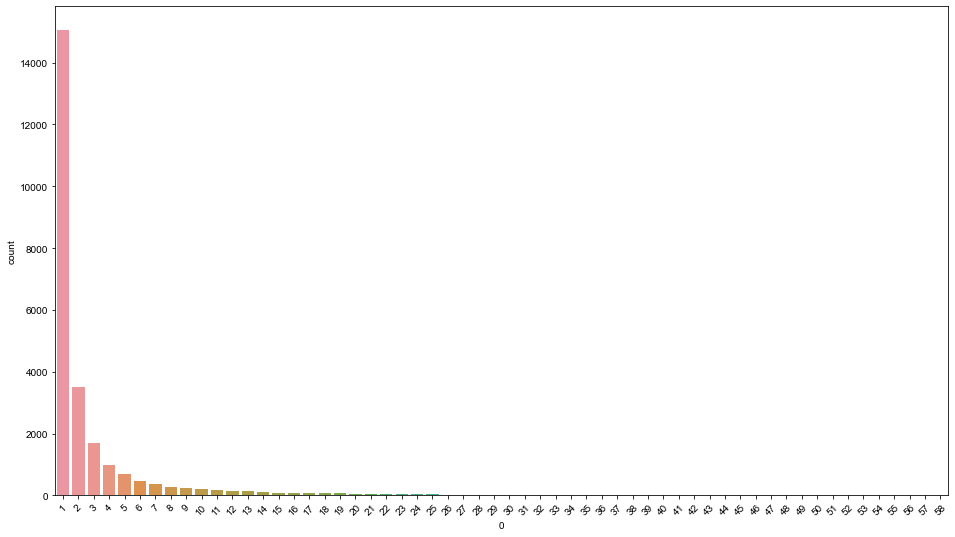

In [18]:
#Amount of types showing up x times in the offensive dataset (e.g 14000 tokens only showing up once, and so on)
#500 Most common tokens skipped, to make plot visible

fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(x=0, data=off_uniq[500:]) #Sns counts the type frequency of each word, and plots it
sns.set_style("darkgrid")
ax.tick_params('x',rotation=45, labelsize = 10) #xlabels are rotated 45 degrees and made bigger

### Noticable difference in the two datasets

<ul>
    <li>Big difference in size, sentiment dataset over twice the amount of tokens (=library twice the size)</li>
    <li>otherwise quite similar, in both sets the percentage of the vocabulary made up of tokens w. frq. 1 is 58%</li>
    <ul><li>Both datasets also seem to follow Zipf's law (see below graphs)</li>
    </ul>
</ul>
    

### Corpus Statistics Consistent with Zipf's law?

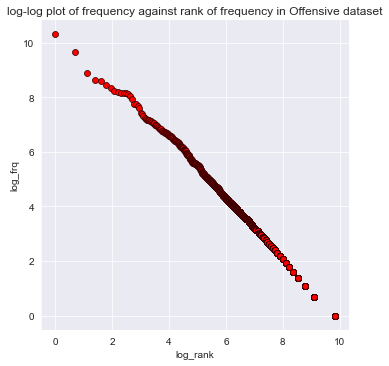

In [19]:
#log-log plot of the rank of token frequency against against the frequency in the offensive dataset
off_uniq["log_frq"] = np.log(off_uniq[0])
off_uniq["log_rank"] = np.log(off_uniq[0].rank(ascending=False))
sns.relplot(x="log_rank",y="log_frq", data=off_uniq, color="red", edgecolor=(0.2,0,0,0.01)).set(title=
                "log-log plot of frequency against rank of frequency in Offensive dataset")
plt.show()

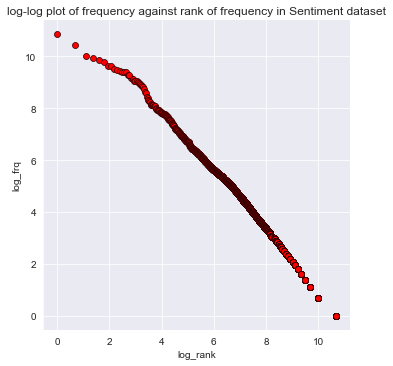

In [20]:
#log-log plot of the rank of token frequency against against the frequency in the sentiment dataset
sent_uniq["log_frq"] = np.log(sent_uniq[0])
sent_uniq["log_rank"] = np.log(sent_uniq[0].rank(ascending=False))
sns.relplot(x="log_rank",y="log_frq", data=sent_uniq, color="r", edgecolor=(0.2,0,0,0.01)).set(title=
                "log-log plot of frequency against rank of frequency in Sentiment dataset")
plt.show()

<b>As seen in the above plots, both datasets seem consistent with Zipf's law</b>

### Generating 100 random tweets for manual annotation

In [23]:
random.seed(42)
random_tweets = random.sample(sentiment_raw,100)

with open("../data/interim/random_tweets.txt","w", encoding="utf-8") as f:
    [f.write(str(i)+"\n") for i in random_tweets]